>라이브러리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# for coloring maps
from matplotlib import colormaps

# for data visualizations

import plotly.express as px

# for preprocessing
from sklearn.preprocessing import StandardScaler

# for label encoding
from sklearn.preprocessing import LabelEncoder

# for data split
from sklearn.model_selection import train_test_split

#데이터 불러오기

In [ ]:
df_filled=pd.read_csv('/content/drive/MyDrive/캡디/최종 보고서용 모델 코드/융합캡스톤디자인_최종데이터.csv')

#데이터 시각화

In [ ]:
df_filled.head().style.background_gradient(cmap="YlGnBu") # colormap 이용해 수치 시각화 (연한색(Yl): 낮은 수치, 진한색(Bu): 높은 수치)

,UCLN_OPN_ETC_SITE_CRCN_YN,UCLN_PRGN_YN,RDT_DTRN_YN,RDT_RT_NO,RDT_DTRN_DCNT,RDT_SITE_KIND_CD,RDT_SITE_CD,RDT_TM1_CGY,RDT_TOTL_TRTM_NT,RDT_TOTL_CGY,HORM_TRTM_YN,HORM_TRTM_PRPS_CD,HORM_TRTM_INGR_NM,HORM_TRTM_DTRN_DCNT,IMPT_ER_EXAM_RSLT_CD,IMPT_PR_EXAM_RSLT_CD,IMPT_AR_EXAM_RSLT_CD,IDGN_AGE,PT_SEX_CD,DRNK_YN,DRNK_STRT_AGE,DRNK_KIND_CD,DRNK_QTY,DRNK_NT,DRNK_DTRN_YCNT,CUR_SMOK_YN,SHIS_YN,SMOK_STRT_AGE,SMOK_QTY,SMOK_DTRN_YCNT,NSMK_PERD_YCNT,MHIS_YN,MHIS_HTN_YN,MHIS_DBT_YN,MHIS_TB_YN,MHIS_LVDS_YN,MHIS_CNCR_YN,MHIS_DEPR_YN,MHIS_INSM_YN,MHIS_CADS_YN,ETC_MHIS_YN,LATST_MDCT_YN,MDCA_YN,MENA_AGE,MENO_YN,MENO_AGE,MENS_CYCL_DCNT,MARG_YN,DELV_YN,FDLV_AGE,DELV_CHLD_CNT,BRFD_EXPR_YN,FEED_DTRN_MCNT,MHIS_BRST_OPRT_YN,OC_USE_YN,OC_USE_DTRN_MCNT,HRT_USE_YN,HRT_DTRN_MCNT,HT_VL,WT_MSRM_VL,BMI_VL,BRCA1_PAVR_DTCT_CLSF_CD,BRCA1_UNCL_VARN_DTCT_CLSF_CD,BRCA2_PAVR_DTCT_CLSF_CD,BRCA2_UNCL_VARN_DTCT_CLSF_CD,target
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,1.000000,1.000000,0.500000,1.000000,10.000000,3.000000,2.000000,1.000000,1.000000,36.000000,79.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,1.000000,12.000000,90.000000,1.000000,1.000000,91.000000,1.000000,0.000000,0.000000,1.000000,1.000000,7.000000,1.000000,4.000000,156.000000,70.000000,28.760000,0.000000,0.000000,0.000000,0.000000,1.000000
1,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,99.000000,5.000000,47.000000,4.000000,99.000000,4.000000,64.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,36.000000,79.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,0.000000,0.000000,100.000000,1.000000,1.000000,38.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,152.000000,61.000000,26.400000,0.000000,0.000000,0.000000,0.000000,1.000000
2,1.000000,0.000000,1.000000,18.000000,63.000000,99.000000,10.000000,9922.000000,8876.000000,1073.000000,1.000000,99.000000,5.000000,91.000000,4.000000,99.000000,1.000000,43.000000,1.000000,1.000000,15.000000,99.000000,12.000000,14.000000,2.000000,1.000000,1.000000,35.000000,68.000000,13.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10.000000,0.000000,0.000000,88.000000,1.000000,1.000000,63.000000,2.000000,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,153.000000,60.000000,25.630000,0.000000,0.000000,0.000000,0.000000,1.000000
3,1.000000,1.000000,1.000000,35.000000,7.000000,99.000000,22.000000,3740.000000,5905.000000,999.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,3.000000,50.000000,1.000000,1.000000,34.000000,2.000000,11.000000,12.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,10.000000,1.000000,93.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,0.000000,0.000000,153.000000,64.000000,27.340000,0.000000,0.000000,0.000000,0.000000,1.000000
4,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,1.000000,1.000000,34.000000,2.000000,11.000000,12.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,6.000000,0.000000,1.000000,20.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,6.000000,156.900000,69.200000,28.110000,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
df_filled.tail().style.background_gradient(cmap="YlGnBu")

,UCLN_OPN_ETC_SITE_CRCN_YN,UCLN_PRGN_YN,RDT_DTRN_YN,RDT_RT_NO,RDT_DTRN_DCNT,RDT_SITE_KIND_CD,RDT_SITE_CD,RDT_TM1_CGY,RDT_TOTL_TRTM_NT,RDT_TOTL_CGY,HORM_TRTM_YN,HORM_TRTM_PRPS_CD,HORM_TRTM_INGR_NM,HORM_TRTM_DTRN_DCNT,IMPT_ER_EXAM_RSLT_CD,IMPT_PR_EXAM_RSLT_CD,IMPT_AR_EXAM_RSLT_CD,IDGN_AGE,PT_SEX_CD,DRNK_YN,DRNK_STRT_AGE,DRNK_KIND_CD,DRNK_QTY,DRNK_NT,DRNK_DTRN_YCNT,CUR_SMOK_YN,SHIS_YN,SMOK_STRT_AGE,SMOK_QTY,SMOK_DTRN_YCNT,NSMK_PERD_YCNT,MHIS_YN,MHIS_HTN_YN,MHIS_DBT_YN,MHIS_TB_YN,MHIS_LVDS_YN,MHIS_CNCR_YN,MHIS_DEPR_YN,MHIS_INSM_YN,MHIS_CADS_YN,ETC_MHIS_YN,LATST_MDCT_YN,MDCA_YN,MENA_AGE,MENO_YN,MENO_AGE,MENS_CYCL_DCNT,MARG_YN,DELV_YN,FDLV_AGE,DELV_CHLD_CNT,BRFD_EXPR_YN,FEED_DTRN_MCNT,MHIS_BRST_OPRT_YN,OC_USE_YN,OC_USE_DTRN_MCNT,HRT_USE_YN,HRT_DTRN_MCNT,HT_VL,WT_MSRM_VL,BMI_VL,BRCA1_PAVR_DTCT_CLSF_CD,BRCA1_UNCL_VARN_DTCT_CLSF_CD,BRCA2_PAVR_DTCT_CLSF_CD,BRCA2_UNCL_VARN_DTCT_CLSF_CD,target
23802,0.000000,0.500000,0.500000,141.000000,18.000000,4.000000,5.000000,1148.500000,216.500000,1891.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,69.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,9.600000,0.000000,0.000000,71.500000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.500000,4.000000,1.000000,0.000000,174.800000,40.700000,13.300000,1.000000,1.000000,1.000000,1.000000,0.000000
23803,0.000000,0.500000,1.000000,321.500000,46.500000,53.500000,55.000000,3041.500000,2870.000000,2564.500000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,69.900000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,14.400000,0.000000,0.000000,39.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.000000,1.000000,7.500000,1.000000,0.000000,145.200000,40.000000,19.000000,1.000000,1.000000,1.000000,1.000000,0.000000
23804,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.500000,1.000000,2.000000,69.600000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.500000,0.500000,0.500000,0.000000,1.000000,17.900000,0.000000,0.000000,90.500000,1.000000,1.000000,39.600000,3.000000,1.000000,1.000000,0.500000,0.500000,2.000000,0.000000,0.000000,175.000000,42.400000,13.800000,1.000000,1.000000,1.000000,1.000000,0.000000
23805,0.000000,0.500000,0.500000,141.000000,18.000000,4.000000,5.000000,1148.500000,216.500000,1891.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,69.900000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,16.300000,0.000000,0.000000,71.500000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.500000,4.000000,1.000000,0.000000,175.000000,40.500000,13.200000,1.000000,1.000000,1.000000,1.000000,0.000000
23806,0.000000,0.500000,0.500000,141.000000,18.000000,4.000000,5.000000,1148.500000,216.500000,1891.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,69.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,11.000000,0.000000,0.000000,71.500000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.500000,4.000000,1.000000,0.000000,175.000000,41.800000,13.600000,1.000000,1.000000,1.000000,1.000000,0.000000


In [ ]:
# dataset의 값 개수(count), mean, 표준편차(std), minimum, maximum, 백분위수 한눈에 보기
df_filled.describe().style.background_gradient(cmap="YlGnBu")

,UCLN_OPN_ETC_SITE_CRCN_YN,UCLN_PRGN_YN,RDT_DTRN_YN,RDT_RT_NO,RDT_DTRN_DCNT,RDT_SITE_KIND_CD,RDT_SITE_CD,RDT_TM1_CGY,RDT_TOTL_TRTM_NT,RDT_TOTL_CGY,HORM_TRTM_YN,HORM_TRTM_PRPS_CD,HORM_TRTM_INGR_NM,HORM_TRTM_DTRN_DCNT,IMPT_ER_EXAM_RSLT_CD,IMPT_PR_EXAM_RSLT_CD,IMPT_AR_EXAM_RSLT_CD,IDGN_AGE,PT_SEX_CD,DRNK_YN,DRNK_STRT_AGE,DRNK_KIND_CD,DRNK_QTY,DRNK_NT,DRNK_DTRN_YCNT,CUR_SMOK_YN,SHIS_YN,SMOK_STRT_AGE,SMOK_QTY,SMOK_DTRN_YCNT,NSMK_PERD_YCNT,MHIS_YN,MHIS_HTN_YN,MHIS_DBT_YN,MHIS_TB_YN,MHIS_LVDS_YN,MHIS_CNCR_YN,MHIS_DEPR_YN,MHIS_INSM_YN,MHIS_CADS_YN,ETC_MHIS_YN,LATST_MDCT_YN,MDCA_YN,MENA_AGE,MENO_YN,MENO_AGE,MENS_CYCL_DCNT,MARG_YN,DELV_YN,FDLV_AGE,DELV_CHLD_CNT,BRFD_EXPR_YN,FEED_DTRN_MCNT,MHIS_BRST_OPRT_YN,OC_USE_YN,OC_USE_DTRN_MCNT,HRT_USE_YN,HRT_DTRN_MCNT,HT_VL,WT_MSRM_VL,BMI_VL,BRCA1_PAVR_DTCT_CLSF_CD,BRCA1_UNCL_VARN_DTCT_CLSF_CD,BRCA2_PAVR_DTCT_CLSF_CD,BRCA2_UNCL_VARN_DTCT_CLSF_CD,target
count,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000,23807.000000
mean,0.256479,0.273386,0.407527,87.428361,20.995190,5.403831,302.144012,2086.022640,2056.240665,2245.300416,0.282312,4.610955,0.669929,14.120217,13.796215,12.471962,13.877263,44.813542,0.980972,0.710337,24.488470,8.581258,4.463897,4.486895,1.901794,0.262570,0.276095,20.333599,19.857059,4.227286,1.466375,0.487105,0.240244,0.253308,0.269144,0.294262,0.204520,0.204541,0.242954,0.236296,0.264817,0.419582,0.546604,11.822414,0.277733,14.144411,50.258936,0.346327,0.335364,17.877851,0.523081,0.186542,2.066493,0.450876,0.453963,1.887134,0.691855,1.257445,158.714294,66.534213,26.419978,0.084051,0.085731,0.084009,0.086277,0.524216
std,0.436699,0.443924,0.441374,107.908678,28.294173,17.856411,1597.012977,2756.067999,2719.730369,2923.975040,0.450134,18.232709,1.406594,27.268853,28.503133,28.586568,30.796125,16.228783,0.136626,0.453615,28.674317,25.455670,6.010470,5.480369,2.455317,0.440040,0.447074,30.805139,30.019197,6.228561,4.179602,0.422526,0.391117,0.375893,0.381359,0.386451,0.351733,0.354502,0.366447,0.369399,0.392219,0.434377,0.421904,2.885514,0.447891,27.464608,29.428438,0.475809,0.472127,28.555528,0.863708,0.389551,6.743627,0.403572,0.431478,2.430278,0.461736,2.469252,8.723024,15.254299,5.833251,0.351233,0.357938,0.351063,0.360089,0.499424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.000000,38.000000,11.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

결측값 제거

In [ ]:
# invalid value 찾기
duplicate = df_filled.duplicated()
print(duplicate.sum())

#invalid value = 0

0


In [ ]:
# missing value 찾기
null = pd.DataFrame({'Null Values' : df_filled.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (df_filled.isna().sum().sort_values(ascending=False)) / (df_filled.shape[0]) * (100)})
null.style.background_gradient(cmap="YlGnBu")

# missing value = 0

,Null Values,Percentage Null Values
UCLN_OPN_ETC_SITE_CRCN_YN,0,0.000000
FDLV_AGE,0,0.000000
MHIS_LVDS_YN,0,0.000000
MHIS_CNCR_YN,0,0.000000
MHIS_DEPR_YN,0,0.000000
MHIS_INSM_YN,0,0.000000
MHIS_CADS_YN,0,0.000000
ETC_MHIS_YN,0,0.000000
LATST_MDCT_YN,0,0.000000
MDCA_YN,0,0.000000


In [ ]:
# outlier 찾기
cat_features = [col for col in df_filled.columns if df_filled[col].dtype=='O']
num_features = [col for col in df_filled.columns if df_filled[col].dtype!='O']

In [ ]:
cat_data=df_filled[cat_features]
cat_data.head()

""
0
1
2
3
4


In [ ]:
num_data = df_filled[num_features]
num_data.head()

,UCLN_OPN_ETC_SITE_CRCN_YN,UCLN_PRGN_YN,RDT_DTRN_YN,RDT_RT_NO,RDT_DTRN_DCNT,RDT_SITE_KIND_CD,RDT_SITE_CD,RDT_TM1_CGY,RDT_TOTL_TRTM_NT,RDT_TOTL_CGY,...,HRT_USE_YN,HRT_DTRN_MCNT,HT_VL,WT_MSRM_VL,BMI_VL,BRCA1_PAVR_DTCT_CLSF_CD,BRCA1_UNCL_VARN_DTCT_CLSF_CD,BRCA2_PAVR_DTCT_CLSF_CD,BRCA2_UNCL_VARN_DTCT_CLSF_CD,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,156.0,70.0,28.76,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,152.0,61.0,26.40,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,18.0,63.0,99.0,10.0,9922.0,8876.0,1073.0,...,0.0,0.0,153.0,60.0,25.63,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,1.0,35.0,7.0,99.0,22.0,3740.0,5905.0,999.0,...,0.0,0.0,153.0,64.0,27.34,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,6.0,156.9,69.2,28.11,0.0,0.0,0.0,0.0,1.0


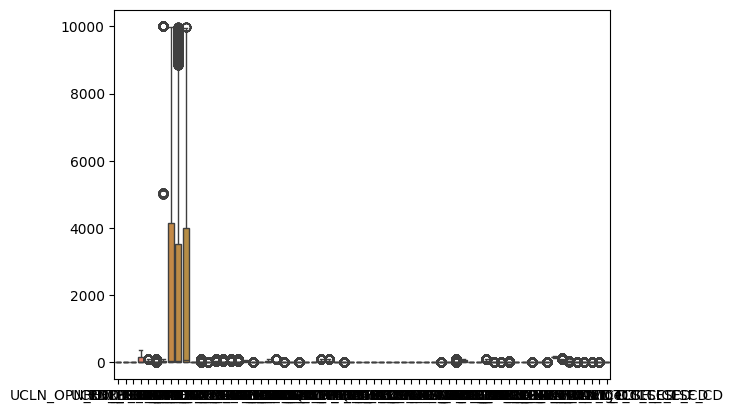

In [ ]:
fig, ax = plt.subplots()
bp = sns.boxplot(data = num_data)

In [ ]:
# 조금 더 자세히 outlier를 분석하기 위해 standard scaler 이용
scaler = StandardScaler()
scaled_array = scaler.fit_transform(num_data)

scaled_data = pd.DataFrame(scaled_array, columns = num_data.columns)
scaled_data.head()

,UCLN_OPN_ETC_SITE_CRCN_YN,UCLN_PRGN_YN,RDT_DTRN_YN,RDT_RT_NO,RDT_DTRN_DCNT,RDT_SITE_KIND_CD,RDT_SITE_CD,RDT_TM1_CGY,RDT_TOTL_TRTM_NT,RDT_TOTL_CGY,...,HRT_USE_YN,HRT_DTRN_MCNT,HT_VL,WT_MSRM_VL,BMI_VL,BRCA1_PAVR_DTCT_CLSF_CD,BRCA1_UNCL_VARN_DTCT_CLSF_CD,BRCA2_PAVR_DTCT_CLSF_CD,BRCA2_UNCL_VARN_DTCT_CLSF_CD,target
0,-0.587326,-0.615852,-0.923334,-0.810224,-0.742048,-0.302633,-0.189197,-0.756899,-0.756062,-0.767909,...,0.667375,1.110706,-0.311171,0.227205,0.401161,-0.239308,-0.239519,-0.239303,-0.239604,0.952687
1,-0.587326,1.636832,-0.923334,-0.810224,-0.742048,-0.302633,-0.189197,-0.756899,-0.756062,-0.767909,...,-1.498409,-0.509252,-0.769737,-0.362805,-0.003425,-0.239308,-0.239519,-0.239303,-0.239604,0.952687
2,1.702631,-0.615852,1.342365,-0.643413,1.484606,5.241710,-0.182935,2.843232,2.507566,-0.400935,...,-1.498409,-0.509252,-0.655096,-0.428361,-0.135430,-0.239308,-0.239519,-0.239303,-0.239604,0.952687
3,1.702631,1.636832,1.342365,-0.485869,-0.494642,5.241710,-0.175421,0.600135,1.415155,-0.426244,...,-1.498409,-0.509252,-0.655096,-0.166135,0.157724,-0.239308,-0.239519,-0.239303,-0.239604,0.952687
4,1.702631,-0.615852,-0.923334,-0.810224,-0.742048,-0.302633,-0.189197,-0.756899,-0.756062,-0.767909,...,0.667375,1.920684,-0.207993,0.174760,0.289728,-0.239308,-0.239519,-0.239303,-0.239604,0.952687


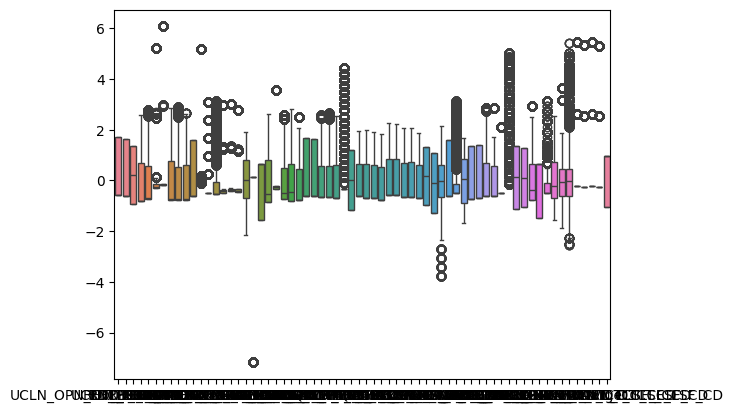

In [ ]:
fig, ax = plt.subplots()
bp = sns.boxplot(data = scaled_data)

In [ ]:
# outliers 제거
Q1 = num_data.quantile(0.25)
Q3 = num_data.quantile(0.75)
IQR = Q3 - Q1

num_data = num_data[~ ((num_data < (Q1 - 1.5 * IQR)) | (num_data > (Q3 + 1.5 * IQR))).any(axis=1)]
cat_data = cat_data.loc[num_data.index]

p_data = pd.concat([cat_data, num_data], axis=1)
p_data.shape



(4741, 66)

#RANDOM FOREST

In [ ]:
print(df_filled.columns)

Index(['UCLN_OPN_ETC_SITE_CRCN_YN', 'UCLN_PRGN_YN', 'RDT_DTRN_YN', 'RDT_RT_NO',
       'RDT_DTRN_DCNT', 'RDT_SITE_KIND_CD', 'RDT_SITE_CD', 'RDT_TM1_CGY',
       'RDT_TOTL_TRTM_NT', 'RDT_TOTL_CGY', 'HORM_TRTM_YN', 'HORM_TRTM_PRPS_CD',
       'HORM_TRTM_INGR_NM', 'HORM_TRTM_DTRN_DCNT', 'IMPT_ER_EXAM_RSLT_CD',
       'IMPT_PR_EXAM_RSLT_CD', 'IMPT_AR_EXAM_RSLT_CD', 'IDGN_AGE', 'PT_SEX_CD',
       'DRNK_YN', 'DRNK_STRT_AGE', 'DRNK_KIND_CD', 'DRNK_QTY', 'DRNK_NT',
       'DRNK_DTRN_YCNT', 'CUR_SMOK_YN', 'SHIS_YN', 'SMOK_STRT_AGE', 'SMOK_QTY',
       'SMOK_DTRN_YCNT', 'NSMK_PERD_YCNT', 'MHIS_YN', 'MHIS_HTN_YN',
       'MHIS_DBT_YN', 'MHIS_TB_YN', 'MHIS_LVDS_YN', 'MHIS_CNCR_YN',
       'MHIS_DEPR_YN', 'MHIS_INSM_YN', 'MHIS_CADS_YN', 'ETC_MHIS_YN',
       'LATST_MDCT_YN', 'MDCA_YN', 'MENA_AGE', 'MENO_YN', 'MENO_AGE',
       'MENS_CYCL_DCNT', 'MARG_YN', 'DELV_YN', 'FDLV_AGE', 'DELV_CHLD_CNT',
       'BRFD_EXPR_YN', 'FEED_DTRN_MCNT', 'MHIS_BRST_OPRT_YN', 'OC_USE_YN',
       'OC_USE_DTRN_MCNT', 'H

##data split

In [ ]:
# data column 나누기 (원인-결과)

y = df_filled['target'] # 결과
X = df_filled.drop(['target'],axis=1) # 원인

cols = X.columns
cols

Index(['UCLN_OPN_ETC_SITE_CRCN_YN', 'UCLN_PRGN_YN', 'RDT_DTRN_YN', 'RDT_RT_NO',
       'RDT_DTRN_DCNT', 'RDT_SITE_KIND_CD', 'RDT_SITE_CD', 'RDT_TM1_CGY',
       'RDT_TOTL_TRTM_NT', 'RDT_TOTL_CGY', 'HORM_TRTM_YN', 'HORM_TRTM_PRPS_CD',
       'HORM_TRTM_INGR_NM', 'HORM_TRTM_DTRN_DCNT', 'IMPT_ER_EXAM_RSLT_CD',
       'IMPT_PR_EXAM_RSLT_CD', 'IMPT_AR_EXAM_RSLT_CD', 'IDGN_AGE', 'PT_SEX_CD',
       'DRNK_YN', 'DRNK_STRT_AGE', 'DRNK_KIND_CD', 'DRNK_QTY', 'DRNK_NT',
       'DRNK_DTRN_YCNT', 'CUR_SMOK_YN', 'SHIS_YN', 'SMOK_STRT_AGE', 'SMOK_QTY',
       'SMOK_DTRN_YCNT', 'NSMK_PERD_YCNT', 'MHIS_YN', 'MHIS_HTN_YN',
       'MHIS_DBT_YN', 'MHIS_TB_YN', 'MHIS_LVDS_YN', 'MHIS_CNCR_YN',
       'MHIS_DEPR_YN', 'MHIS_INSM_YN', 'MHIS_CADS_YN', 'ETC_MHIS_YN',
       'LATST_MDCT_YN', 'MDCA_YN', 'MENA_AGE', 'MENO_YN', 'MENO_AGE',
       'MENS_CYCL_DCNT', 'MARG_YN', 'DELV_YN', 'FDLV_AGE', 'DELV_CHLD_CNT',
       'BRFD_EXPR_YN', 'FEED_DTRN_MCNT', 'MHIS_BRST_OPRT_YN', 'OC_USE_YN',
       'OC_USE_DTRN_MCNT', 'H

##모델학습(StratifiedKFold로 data 균등하게 split)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)
n_iter = 0

# StratifiedKFold loop
for train_index, test_index in skf.split(X, y):
    n_iter += 1
    if isinstance(X, pd.DataFrame):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    else:
        X_train, X_test = X[train_index], X[test_index]

    if isinstance(y, pd.Series):
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    else:
        y_train, y_test = y[train_index], y[test_index]

    # Train the model
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions
    y_pred = rf.predict(X_test)

    # Print results
    print(f'##################### 교차 검증 ######################## : {n_iter}')
    print(f'교차 검증 정확도 : {accuracy_score(y_test, y_pred)}')
    print('학습 레이블(y_train) 데이터 분포 : \n', pd.Series(y_train).value_counts())
    print('검증 레이블(y_test) 데이터 분포 : \n', pd.Series(y_test).value_counts())
    print('\n')

##################### 교차 검증 ######################## : 1
교차 검증 정확도 : 0.999160016799664
학습 레이블(y_train) 데이터 분포 : 
 target
1.0    9984
0.0    9061
Name: count, dtype: int64
검증 레이블(y_test) 데이터 분포 : 
 target
1.0    2496
0.0    2266
Name: count, dtype: int64


##################### 교차 검증 ######################## : 2
교차 검증 정확도 : 0.999790004199916
학습 레이블(y_train) 데이터 분포 : 
 target
1.0    9984
0.0    9061
Name: count, dtype: int64
검증 레이블(y_test) 데이터 분포 : 
 target
1.0    2496
0.0    2266
Name: count, dtype: int64


##################### 교차 검증 ######################## : 3
교차 검증 정확도 : 1.0
학습 레이블(y_train) 데이터 분포 : 
 target
1.0    9984
0.0    9062
Name: count, dtype: int64
검증 레이블(y_test) 데이터 분포 : 
 target
1.0    2496
0.0    2265
Name: count, dtype: int64


##################### 교차 검증 ######################## : 4
교차 검증 정확도 : 0.9997899600924176
학습 레이블(y_train) 데이터 분포 : 
 target
1.0    9984
0.0    9062
Name: count, dtype: int64
검증 레이블(y_test) 데이터 분포 : 
 target
1.0    2496
0.0    2265
Name: count, dtyp

##변수 중요도

In [ ]:

# 5. 변수 중요도 추출
importances = rf.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)


In [ ]:
# 중요도가 0인 변수를 제외
non_zero_importances = feature_importances[feature_importances > 0]

# 중요도가 0이 아닌 변수들 출력
print("Features with non-zero importance:")
print(non_zero_importances)
# 중요도가 0이 아닌 변수의 개수
num_non_zero_features = len(non_zero_importances)
print("Number of features with non-zero importance:", num_non_zero_features)

# 중요도가 0이 아닌 변수들 목록
non_zero_features = non_zero_importances.index.tolist()
print("\nList of features with non-zero importance:")
print(non_zero_features)


Features with non-zero importance:
SMOK_QTY                        0.132736
SMOK_STRT_AGE                   0.132095
SMOK_DTRN_YCNT                  0.094063
HORM_TRTM_YN                    0.074781
HORM_TRTM_DTRN_DCNT             0.068563
                                  ...   
BRCA1_UNCL_VARN_DTCT_CLSF_CD    0.000231
MHIS_TB_YN                      0.000202
BRCA2_PAVR_DTCT_CLSF_CD         0.000164
PT_SEX_CD                       0.000164
BRCA1_PAVR_DTCT_CLSF_CD         0.000110
Length: 65, dtype: float64
Number of features with non-zero importance: 65

List of features with non-zero importance:
['SMOK_QTY', 'SMOK_STRT_AGE', 'SMOK_DTRN_YCNT', 'HORM_TRTM_YN', 'HORM_TRTM_DTRN_DCNT', 'HORM_TRTM_PRPS_CD', 'MENO_YN', 'MENO_AGE', 'UCLN_PRGN_YN', 'MENA_AGE', 'SHIS_YN', 'UCLN_OPN_ETC_SITE_CRCN_YN', 'CUR_SMOK_YN', 'RDT_DTRN_YN', 'FDLV_AGE', 'HORM_TRTM_INGR_NM', 'MHIS_BRST_OPRT_YN', 'HRT_USE_YN', 'DRNK_KIND_CD', 'DRNK_YN', 'LATST_MDCT_YN', 'IDGN_AGE', 'NSMK_PERD_YCNT', 'RDT_TM1_CGY', 'HRT_DTRN

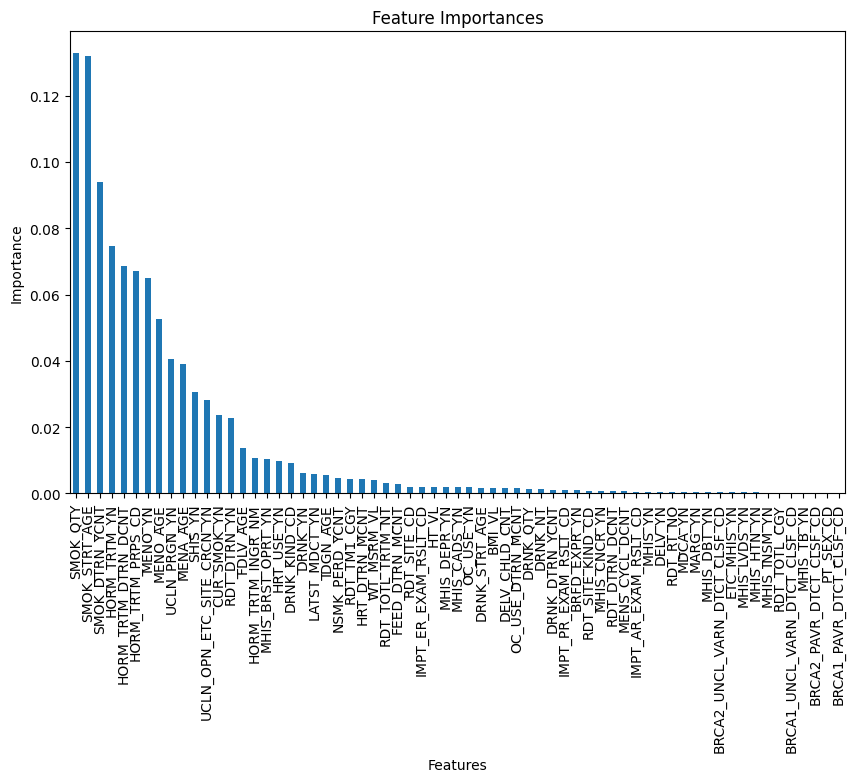

In [ ]:
# 6. 변수 중요도 시각화
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


In [ ]:
# 7. 변수 중요도 출력
print("Feature Importances in Descending Order:")
print(feature_importances)

Feature Importances in Descending Order:
SMOK_QTY                        0.132736
SMOK_STRT_AGE                   0.132095
SMOK_DTRN_YCNT                  0.094063
HORM_TRTM_YN                    0.074781
HORM_TRTM_DTRN_DCNT             0.068563
                                  ...   
BRCA1_UNCL_VARN_DTCT_CLSF_CD    0.000231
MHIS_TB_YN                      0.000202
BRCA2_PAVR_DTCT_CLSF_CD         0.000164
PT_SEX_CD                       0.000164
BRCA1_PAVR_DTCT_CLSF_CD         0.000110
Length: 65, dtype: float64


In [ ]:
# 임계값 설정 (예시: 중요도가 0.01보다 큰 변수들만 선택)
threshold_1 = 0.01

# 임계값보다 큰 변수들 선택
important_features_1 = feature_importances[feature_importances > threshold_1]

# 중요도가 임계값보다 큰 변수들의 개수
num_important_features_1 = len(important_features_1)

print("Number of features with importance greater than threshold ({}): {}".format(threshold_1, num_important_features_1))
print("\nList of important features:")
print(important_features_1)

Number of features with importance greater than threshold (0.01): 17

List of important features:
SMOK_QTY                     0.132736
SMOK_STRT_AGE                0.132095
SMOK_DTRN_YCNT               0.094063
HORM_TRTM_YN                 0.074781
HORM_TRTM_DTRN_DCNT          0.068563
HORM_TRTM_PRPS_CD            0.067096
MENO_YN                      0.065125
MENO_AGE                     0.052642
UCLN_PRGN_YN                 0.040523
MENA_AGE                     0.038977
SHIS_YN                      0.030706
UCLN_OPN_ETC_SITE_CRCN_YN    0.028274
CUR_SMOK_YN                  0.023740
RDT_DTRN_YN                  0.022791
FDLV_AGE                     0.013859
HORM_TRTM_INGR_NM            0.010720
MHIS_BRST_OPRT_YN            0.010547
dtype: float64


In [ ]:
# 임계값 설정 (예시: 중요도가 0.05보다 큰 변수들만 선택)
threshold_2 = 0.05

# 임계값보다 큰 변수들 선택
important_features_2 = feature_importances[feature_importances > threshold_2]

# 중요도가 임계값보다 큰 변수들의 개수
num_important_features_2 = len(important_features_2)

print("Number of features with importance greater than threshold ({}): {}".format(threshold_2, num_important_features_2))
print("\nList of important features:")
print(important_features_2)

Number of features with importance greater than threshold (0.05): 8

List of important features:
SMOK_QTY               0.132736
SMOK_STRT_AGE          0.132095
SMOK_DTRN_YCNT         0.094063
HORM_TRTM_YN           0.074781
HORM_TRTM_DTRN_DCNT    0.068563
HORM_TRTM_PRPS_CD      0.067096
MENO_YN                0.065125
MENO_AGE               0.052642
dtype: float64


In [ ]:

# 모든 환자의 변수 중요도를 계산하는 함수 수정
def calculate_contribution_all(X_data, model):
    # 예측 확률을 얻습니다.
    probas = model.predict_proba(X_data)
    # 클래스 1(악성)에 대한 예측 확률을 추출합니다.
    malignancy_probas = probas[:, 1]

    # 변수 중요도를 초기화합니다.
    variable_contributions_all = []

    # 각 샘플에 대한 변수 중요도를 계산합니다.
    for sample_probas in malignancy_probas:
        # 각 변수의 중요도를 백분율로 계산하여 리스트에 추가합니다.
        sample_contributions = sample_probas * importances * 100
        variable_contributions_all.append(sample_contributions)

    return np.array(variable_contributions_all)

# 모든 훈련 데이터셋에서 각 환자의 변수 중요도 추출
train_variable_contributions_all = calculate_contribution_all(X_train, rf)

# 각 환자의 변수 중요도를 데이터프레임으로 변환 후 기여도 내림차순으로 정렬
df_all_contributions = pd.DataFrame(train_variable_contributions_all, columns=X.columns)
df_all_contributions_sorted = df_all_contributions.mean().sort_values(ascending=False)

# 변수 중요도를 표로 출력
print("Average contribution of each feature to malignancy for all patients:")
print(df_all_contributions_sorted)


Average contribution of each feature to malignancy for all patients:
SMOK_QTY                        6.952567
SMOK_STRT_AGE                   6.918989
SMOK_DTRN_YCNT                  4.926916
HORM_TRTM_YN                    3.916956
HORM_TRTM_DTRN_DCNT             3.591218
                                  ...   
BRCA1_UNCL_VARN_DTCT_CLSF_CD    0.012082
MHIS_TB_YN                      0.010581
BRCA2_PAVR_DTCT_CLSF_CD         0.008610
PT_SEX_CD                       0.008598
BRCA1_PAVR_DTCT_CLSF_CD         0.005787
Length: 65, dtype: float64


##100번째 환자의 변수 중요도

In [ ]:
# 100번째 환자의 변수 중요도를 데이터프레임으로 변환 후 기여도 내림차순으로 정렬
df_100th_patient_contribution = pd.DataFrame(train_variable_contributions_all[100], index=X.columns, columns=["Contribution"])
df_100th_patient_contribution_sorted = df_100th_patient_contribution.sort_values(by="Contribution", ascending=False)

# 100번째 환자의 변수 중요도를 표로 출력
print("Contribution of each feature to malignancy for the 100th patient:")
print(df_100th_patient_contribution_sorted)


Contribution of each feature to malignancy for the 100th patient:
                              Contribution
SMOK_QTY                         13.273649
SMOK_STRT_AGE                    13.209544
SMOK_DTRN_YCNT                    9.406332
HORM_TRTM_YN                      7.478145
HORM_TRTM_DTRN_DCNT               6.856254
...                                    ...
BRCA1_UNCL_VARN_DTCT_CLSF_CD      0.023067
MHIS_TB_YN                        0.020202
BRCA2_PAVR_DTCT_CLSF_CD           0.016438
PT_SEX_CD                         0.016415
BRCA1_PAVR_DTCT_CLSF_CD           0.011048

[65 rows x 1 columns]


#모델 평가

In [ ]:
from joblib import dump

# 모델 저장
dump(rf, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [ ]:
from joblib import load
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 저장된 모델 불러오기
loaded_model = load('random_forest_model.joblib')

# 테스트 데이터에 대한 예측 수행
y_pred = loaded_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬 출력
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9989498004620878

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2265
         1.0       1.00      1.00      1.00      2496

    accuracy                           1.00      4761
   macro avg       1.00      1.00      1.00      4761
weighted avg       1.00      1.00      1.00      4761


Confusion Matrix:
[[2264    1]
 [   4 2492]]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# 모델 훈련
loaded_model.fit(X_train, y_train)

# 예측
y_pred = loaded_model.predict(X_test)

# 평가 지표 계산
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 결과 출력
print('Model:')
print(f'  Mean Squared Error (MSE): {mse}')
print(f'  Root Mean Squared Error (RMSE): {rmse}')
print(f'  Mean Absolute Error (MAE): {mae}')
print(f'  R² Score: {r2}')
print()

# 결과를 데이터프레임으로 저장
regression_results_df = pd.DataFrame({
    'Model': [loaded_model.__class__.__name__],
    'MSE': [mse],
    'RMSE': [rmse],
    'MAE': [mae],
    'R2 Score': [r2]
})

print(regression_results_df)


Model:
  Mean Squared Error (MSE): 0.0010501995379122034
  Root Mean Squared Error (RMSE): 0.03240678228260565
  Mean Absolute Error (MAE): 0.0010501995379122034
  R² Score: 0.9957892893530311

                    Model      MSE      RMSE      MAE  R2 Score
0  RandomForestClassifier  0.00105  0.032407  0.00105  0.995789


#변수 상관관계

In [ ]:
print("Number of features with importance greater than threshold ({}): {}".format(threshold_1, num_important_features_1))
print(important_features_1.index.tolist())

Number of features with importance greater than threshold (0.01): 17
['SMOK_QTY', 'SMOK_STRT_AGE', 'SMOK_DTRN_YCNT', 'HORM_TRTM_YN', 'HORM_TRTM_DTRN_DCNT', 'HORM_TRTM_PRPS_CD', 'MENO_YN', 'MENO_AGE', 'UCLN_PRGN_YN', 'MENA_AGE', 'SHIS_YN', 'UCLN_OPN_ETC_SITE_CRCN_YN', 'CUR_SMOK_YN', 'RDT_DTRN_YN', 'FDLV_AGE', 'HORM_TRTM_INGR_NM', 'MHIS_BRST_OPRT_YN']


In [ ]:
data_mean_1 = df_filled[['SMOK_QTY','SMOK_STRT_AGE','SMOK_DTRN_YCNT','HORM_TRTM_YN',
                'HORM_TRTM_DTRN_DCNT','HORM_TRTM_PRPS_CD','MENO_YN','MENO_AGE',
                'UCLN_PRGN_YN','MENA_AGE','SHIS_YN','UCLN_OPN_ETC_SITE_CRCN_YN',
                'CUR_SMOK_YN','RDT_DTRN_YN','FDLV_AGE','HORM_TRTM_INGR_NM','MHIS_BRST_OPRT_YN',
                'HRT_USE_YN','HRT_DTRN_MCNT','target']]

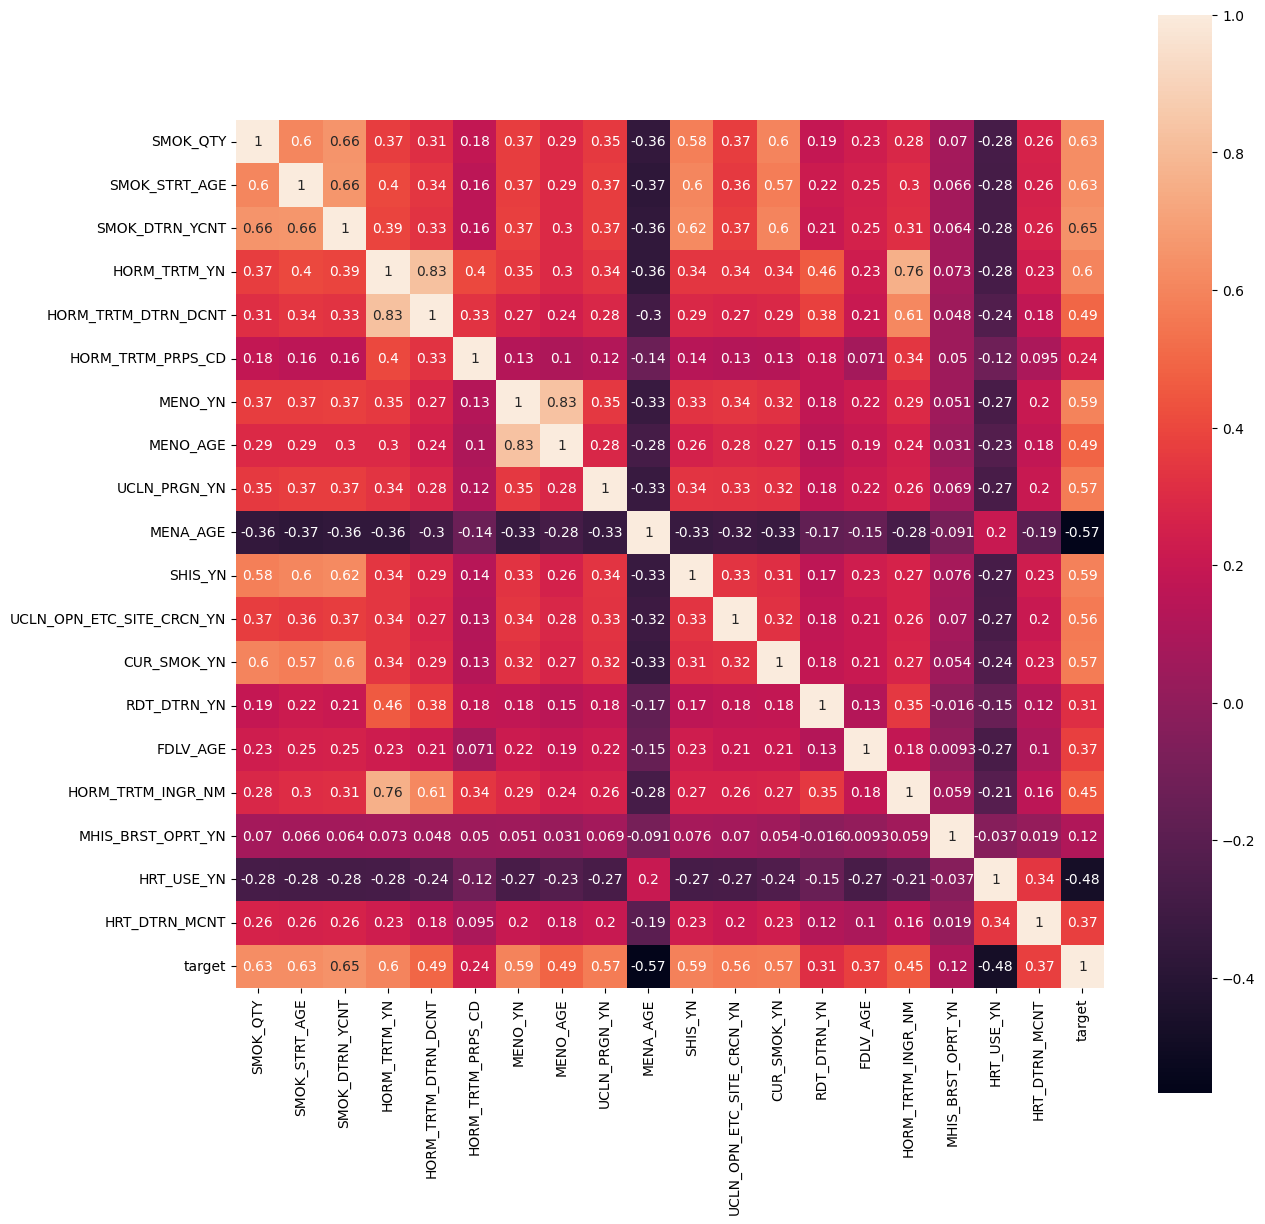

In [ ]:
plt.figure(figsize=(14,14))
foo = sns.heatmap(data_mean_1.corr(), vmax=1, square=True, annot=True)
